In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from numpy import array
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import cross_val_score

In [5]:
data = pd.read_csv('C:/Users/preet/Documents/ML LAB/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
values = data.values

In [8]:
values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [9]:
# Bootstrapping
n_iterations = 10
n_size = int(len(data)*0.50)

In [10]:
# Running bootstrap
stats = list()
for i in range(n_iterations):
    
    # prepare train and test sets
    train = resample(values, n_samples = n_size) #Sampling with replacement
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    
    #evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    
    print("Score is: ", score)
    stats.append(score)

Score is:  0.6666666666666666
Score is:  0.6645021645021645
Score is:  0.6837606837606838
Score is:  0.6967032967032967
Score is:  0.6617021276595745
Score is:  0.7034632034632035
Score is:  0.6858974358974359
Score is:  0.7185501066098081
Score is:  0.7381974248927039
Score is:  0.7


(array([3., 0., 1., 1., 1., 2., 0., 1., 0., 1.]),
 array([0.66170213, 0.66935166, 0.67700119, 0.68465072, 0.69230025,
        0.69994978, 0.70759931, 0.71524884, 0.72289837, 0.7305479 ,
        0.73819742]),
 <BarContainer object of 10 artists>)

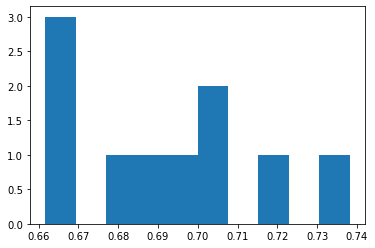

In [11]:
plt.hist(stats)

In [12]:
#Cross validation - KFold
X = values[:,:-1]
y = values[:,-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.50, random_state=1)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model = LogisticRegression(solver='newton-cg')
results = cross_val_score(model, X, y, cv = kfold)
print(results)
print('Accuracy: %.3f%% (%.3f%%)' %(results.mean()*100.0, results.std()*100.0))

[0.7012987  0.80519481 0.72727273 0.84415584 0.83116883 0.67532468
 0.85714286 0.77922078 0.69736842 0.78947368]
Accuracy: 77.076% (6.270%)


In [14]:
cv = LeaveOneOut()

In [15]:
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    #print('train: %s, test: %s' %(X[train_ix], X[test_ix]))
    #split data
    X_train, X_test = X[train_ix, :], X[test_ix,:]
    y_train, y_test = y[train_ix], y[test_ix]
    # fit model
    model = RandomForestClassifier(random_state=1)
    model.fit(X_train, y_train)
    # evaluate model
    yhat = model.predict(X_test)
    # store
    y_true.append(y_test[0])
    y_pred.append(yhat[0])
    
    acc= accuracy_score(y_true, y_pred)
    print("Accuracy: %.3f" % acc)

Accuracy: 1.000
Accuracy: 1.000
Accuracy: 1.000
Accuracy: 1.000
Accuracy: 1.000
Accuracy: 1.000
Accuracy: 0.857
Accuracy: 0.750
Accuracy: 0.778
Accuracy: 0.700
Accuracy: 0.727
Accuracy: 0.750
Accuracy: 0.769
Accuracy: 0.786
Accuracy: 0.800
Accuracy: 0.750
Accuracy: 0.765
Accuracy: 0.722
Accuracy: 0.737
Accuracy: 0.700
Accuracy: 0.714
Accuracy: 0.727
Accuracy: 0.739
Accuracy: 0.708
Accuracy: 0.720
Accuracy: 0.692
Accuracy: 0.704
Accuracy: 0.714
Accuracy: 0.724
Accuracy: 0.733
Accuracy: 0.710
Accuracy: 0.719
Accuracy: 0.727
Accuracy: 0.735
Accuracy: 0.714
Accuracy: 0.722
Accuracy: 0.703
Accuracy: 0.711
Accuracy: 0.692
Accuracy: 0.675
Accuracy: 0.659
Accuracy: 0.643
Accuracy: 0.651
Accuracy: 0.659
Accuracy: 0.644
Accuracy: 0.652
Accuracy: 0.638
Accuracy: 0.646
Accuracy: 0.633
Accuracy: 0.640
Accuracy: 0.647
Accuracy: 0.654
Accuracy: 0.660
Accuracy: 0.667
Accuracy: 0.655
Accuracy: 0.661
Accuracy: 0.667
Accuracy: 0.655
Accuracy: 0.644
Accuracy: 0.650
Accuracy: 0.656
Accuracy: 0.661
Accuracy